In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

pic = cv2.imread('Pflanze.png')

In [2]:
cv2.imshow('Pflanze', pic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
pic.shape

(381, 418, 3)

In [4]:
image_rgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pixels = image_rgb.reshape(-1, 3)
unique_colors = set(tuple(pixel) for pixel in pixels)
num_unique_colors = len(unique_colors)

print("Number of unique colors:", num_unique_colors)

Number of unique colors: 123858


In [5]:
pic_hsv = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV)
test = cv2.inRange(pic_hsv, (36, 25, 25), (86, 255, 255))

cv2.imshow('segement', test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

transform = transforms.ToTensor()
image = Image.open('Pflanze.png')
image_tensor = transform(image)



C:\Studium\MasterStudium\PythonEnvironment\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [7]:
import torchvision.transforms as T
import torch.nn as nn
import torchvision
from torchvision.transforms import Compose, RandomHorizontalFlip
import matplotlib.pyplot as plt

image = torchvision.io.read_image('Pflanze.png')
flipper = T.RandomHorizontalFlip(p=1.0)
flipped_image = flipper(image)


In [8]:
flipped_image.shape

torch.Size([3, 381, 418])

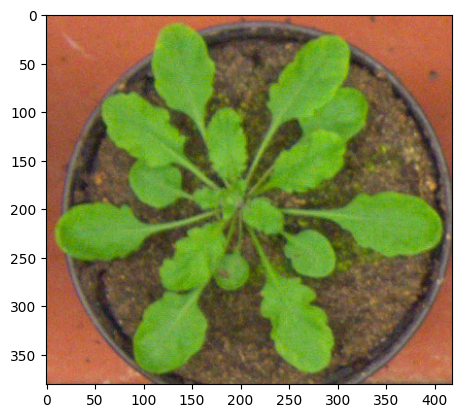

In [9]:
plt.imshow(flipped_image.permute(1, 2, 0))

Image Augmentation

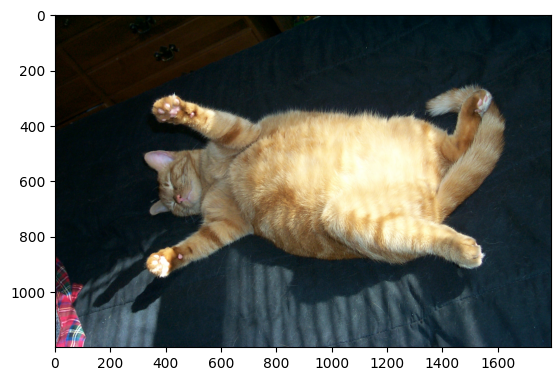

In [10]:
from d2l import torch as d2l
import torchvision.transforms as transforms

# Load the image as a tensor
cat_tensor = transforms.ToTensor()(d2l.Image.open('Big_Fat_Red_Cat.jpg')).unsqueeze(0)

d2l.plt.imshow(transforms.ToPILImage()(cat_tensor.squeeze(0)))
d2l.plt.show()


In [11]:
from d2l import torch as d2l
import torchvision.transforms as transforms

def apply(img, aug, num_rows=2, num_cols=4, scale=1, show_img=False):
    # Convert input tensor to PIL Image
    input_pil = transforms.ToPILImage()(img.squeeze(0))
    input_size = input_pil.size  # Get the size of the input image

    # Compute aspect ratio
    aspect_ratio = input_size[0] / input_size[1]

    # Compute target size based on scale and aspect ratio
    target_height = int(input_size[1] * scale)
    target_width = int(target_height * aspect_ratio)

    # Apply augmentation and resize to match input size
    Y_pil = [transforms.Compose([
        aug,
        transforms.Resize((target_height, target_width)),  # Resize with computed size
        transforms.ToPILImage()
    ])(img.squeeze(0)) for _ in range(num_rows * num_cols)]

    d2l.show_images(Y_pil, num_rows, num_cols, scale=scale)
    if show_img:
        return Y_pil


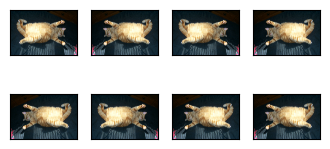

In [12]:
apply(cat_tensor, torchvision.transforms.RandomHorizontalFlip())

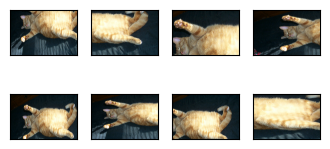

In [13]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200,200), scale=(0.1,1), ratio=(0.5,2)
)
apply(cat_tensor, shape_aug)

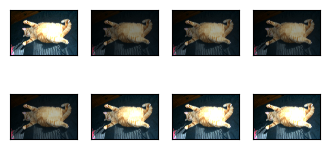

In [14]:
apply(cat_tensor, torchvision.transforms.ColorJitter(brightness=0.5, contrast=0, saturation=0, hue=0))

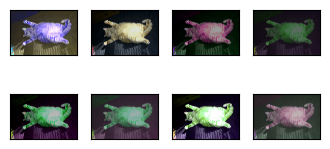

In [15]:
color_aug = torchvision.transforms.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(cat_tensor, color_aug)

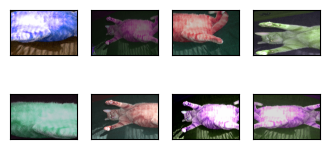

In [16]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug
])
test = apply(cat_tensor.squeeze(), augs, scale=1, show_img=True)

In [17]:
from skimage.metrics import structural_similarity as ssim

def compute_mse(tensor1, tensor2):
    mse = torch.mean((tensor1 - tensor2)**2)
    return mse.item()



In [18]:
mse_values = []
for i in range(0, len(test)):
    mse_values.append(compute_mse(transforms.ToTensor()(test[i]), cat_tensor.squeeze()))

    print("Mean Squared Error (MSE):", mse_values[i])

Mean Squared Error (MSE): 0.2663474977016449
Mean Squared Error (MSE): 0.05840287357568741
Mean Squared Error (MSE): 0.1006087139248848
Mean Squared Error (MSE): 0.0787268579006195
Mean Squared Error (MSE): 0.11086232215166092
Mean Squared Error (MSE): 0.07883898168802261
Mean Squared Error (MSE): 0.10507938265800476
Mean Squared Error (MSE): 0.10806915909051895
